In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:06<00:00, 149MB/s]
100% 1.06G/1.06G [00:06<00:00, 164MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [15]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 59s 83ms/step - loss: 0.5988 - accuracy: 0.6704 - val_loss: 0.5404 - val_accuracy: 0.7270
Epoch 2/10
625/625 [==============================] - 57s 90ms/step - loss: 0.4597 - accuracy: 0.7837 - val_loss: 0.4615 - val_accuracy: 0.7866
Epoch 3/10
625/625 [==============================] - 55s 87ms/step - loss: 0.3447 - accuracy: 0.8476 - val_loss: 0.4864 - val_accuracy: 0.7988
Epoch 4/10
625/625 [==============================] - 55s 88ms/step - loss: 0.2025 - accuracy: 0.9164 - val_loss: 0.6998 - val_accuracy: 0.7910
Epoch 5/10
625/625 [==============================] - 51s 80ms/step - loss: 0.1155 - accuracy: 0.9559 - val_loss: 0.8858 - val_accuracy: 0.7842
Epoch 6/10
625/625 [==============================] - 52s 82ms/step - loss: 0.0811 - accuracy: 0.9713 - val_loss: 0.9698 - val_accuracy: 0.7998
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0483 - accuracy: 0.9835 - val_loss: 1.2215 - val_accuracy:

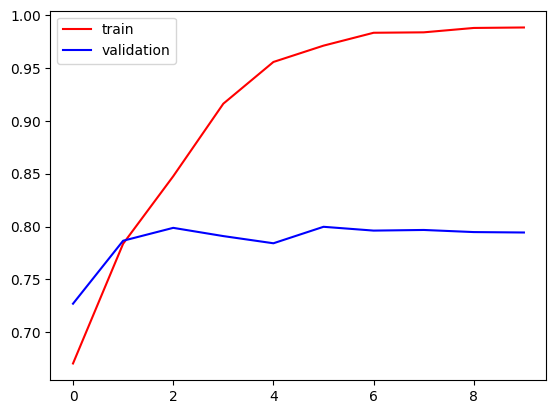

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

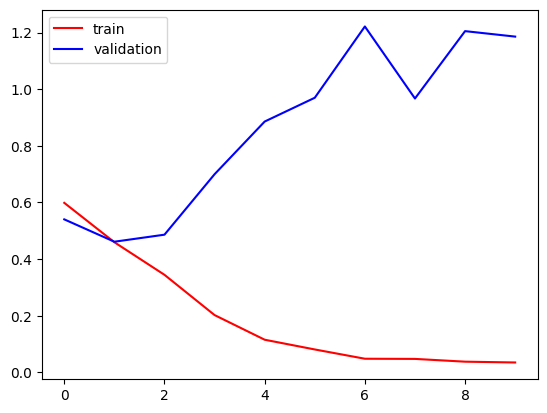

In [12]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [14]:
# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [17]:
import cv2

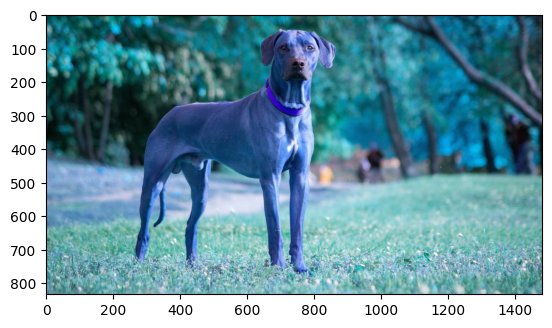

1/1 [==============================] - 0s 27ms/step
This is dog! 0.99999976


In [21]:
test_img = cv2.imread('/content/dog.jpg')
plt.imshow(test_img)
plt.show()
test_img = cv2.resize(test_img, (256, 256))
test_input  = test_img.reshape((1, 256, 256, 3))
prediction = model.predict(test_input)
if prediction[0][0] > 0.5:
  print("This is dog!", prediction[0][0])
else:
  print("This is cat", 1 - prediction[0][0])